In [48]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
!pip install nltk wordcloud matplotlib seaborn scikit-learn


In [52]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

# Load text from your Google Drive file
with open('/content/drive/MyDrive/CS441_2025/Visualization - Alice in Wonderland/data.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Clean and tokenize
text_clean = re.sub(r'[^a-zA-Z\s]', '', text.lower())
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(text_clean)

# Remove stopwords
stop_words = set(stopwords.words('english'))
tokens_clean = [word for word in tokens if word not in stop_words]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


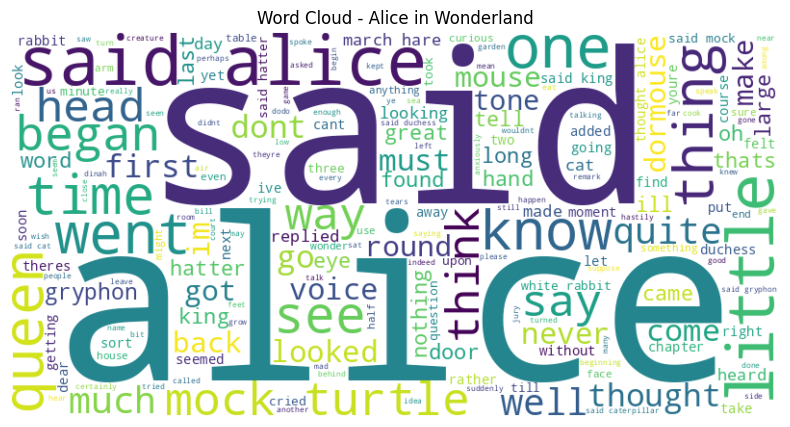

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens_clean))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Alice in Wonderland")

# Save + Show
plt.savefig('/content/drive/MyDrive/CS441_2025/Visualization - Alice in Wonderland/wordcloud.png')
plt.show()


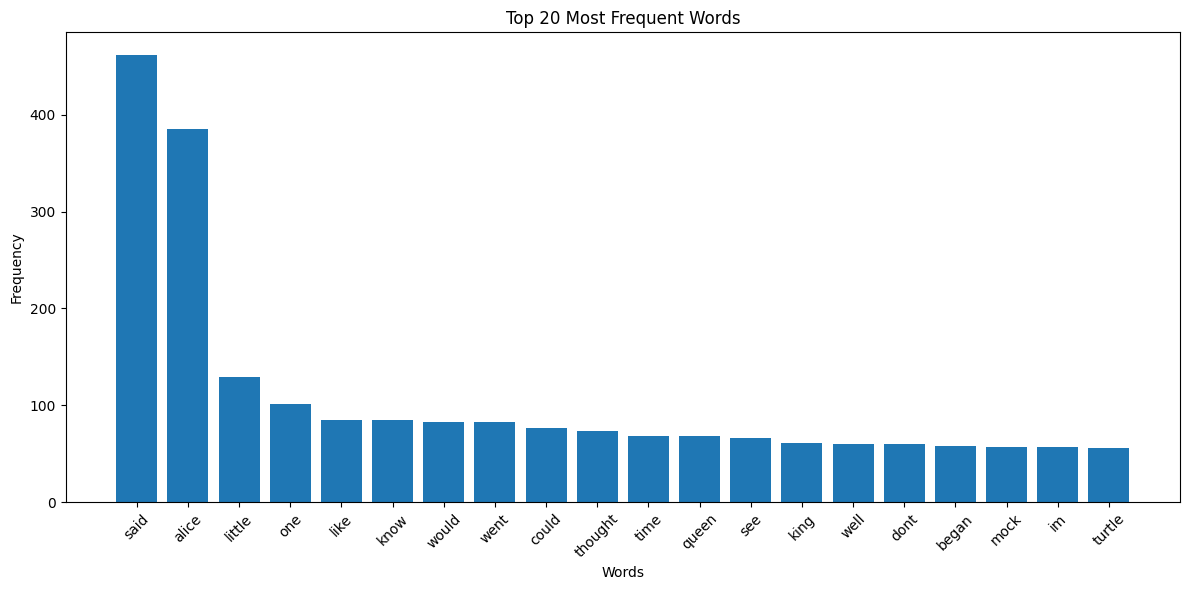

In [56]:
# Frequency bar chart
plt.figure(figsize=(12, 6))
plt.bar(words, freqs)
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()

# Save + Show
plt.savefig('/content/drive/MyDrive/CS441_2025/Visualization - Alice in Wonderland/frequency_barchart.png')
plt.show()


In [37]:
# Remove old folder if it exists
!rm -rf glove_files

# Download GloVe zip file (if not already exists)
!wget http://nlp.stanford.edu/data/glove.6B.zip -O glove.6B.zip

# Unzip GloVe into glove_files folder, overwrite all files without prompt
!unzip -o glove.6B.zip -d glove_files



--2025-04-21 17:51:00--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-04-21 17:51:00--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-04-21 17:51:01--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [44]:
import numpy as np

# Load GloVe embeddings
glove_embeddings = {}
with open('glove_files/glove.6B.100d.txt', 'r', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.array(values[1:], dtype='float32')
        glove_embeddings[word] = vector

# Chọn từ phổ biến có trong GloVe
word_freq = Counter(tokens_clean)
common_words = word_freq.most_common(300)
valid_common_words = [(word, freq) for word, freq in common_words if word in glove_embeddings]
selected_words = [word for word, _ in valid_common_words[:50]]
vectors = np.array([glove_embeddings[word] for word in selected_words])


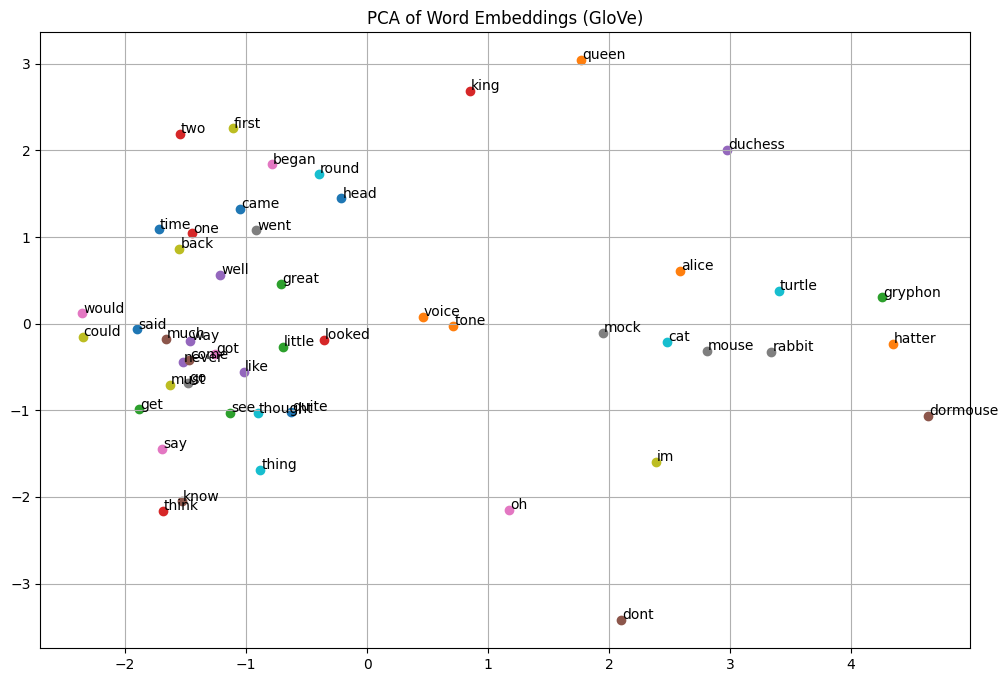

In [57]:
from sklearn.decomposition import PCA

if len(vectors) >= 2:
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(vectors)

    plt.figure(figsize=(12, 8))
for i, word in enumerate(selected_words):
    plt.scatter(reduced[i, 0], reduced[i, 1])
    plt.text(reduced[i, 0]+0.01, reduced[i, 1]+0.01, word)
plt.title("PCA of Word Embeddings (GloVe)")
plt.grid(True)

# Save + Show
plt.savefig('/content/drive/MyDrive/CS441_2025/Visualization - Alice in Wonderland/pca_plot.png')
plt.show()



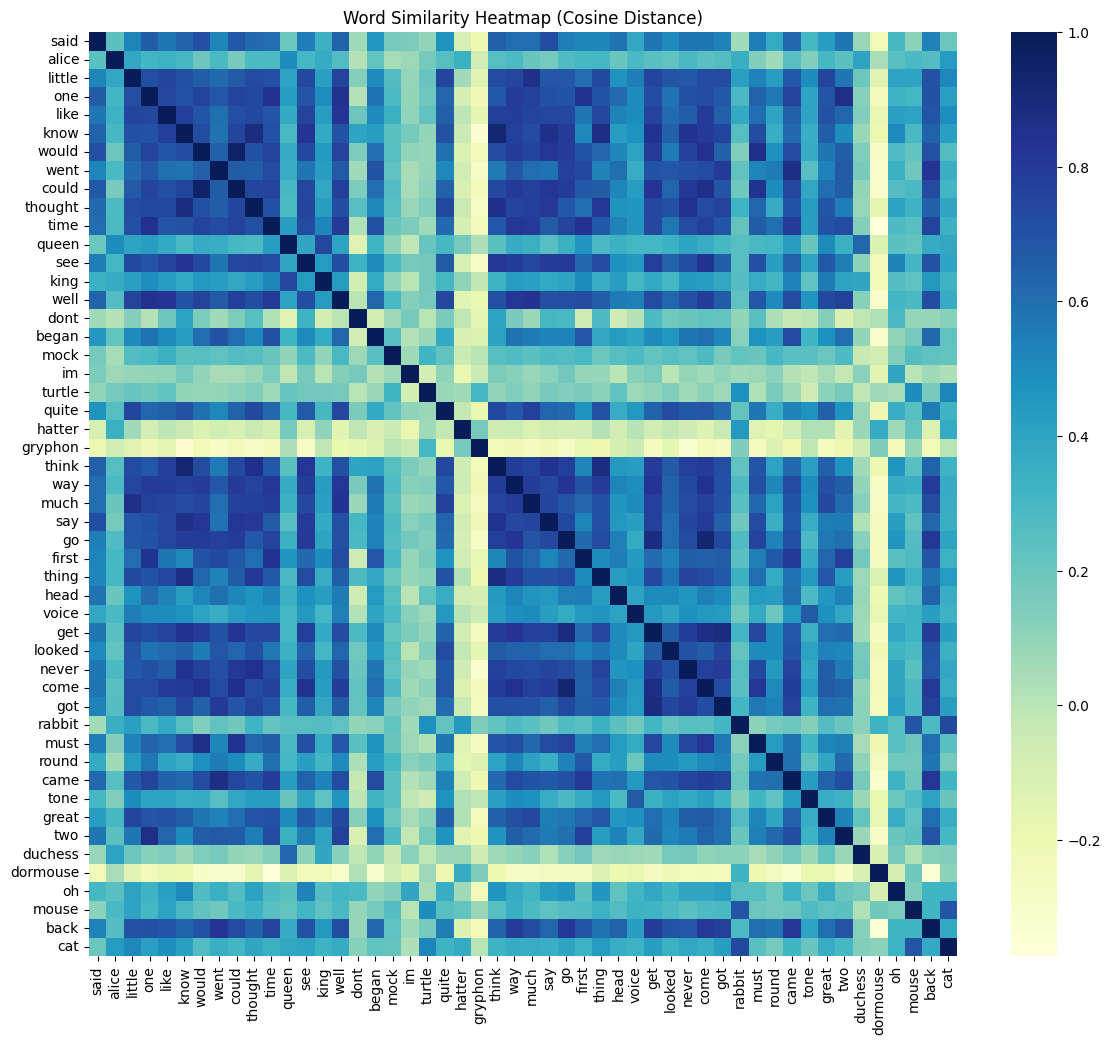

In [58]:
import seaborn as sns
import pandas as pd

# Cosine similarity
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2)/(np.linalg.norm(vec1)*np.linalg.norm(vec2))

# Similarity matrix
similarity_matrix = np.zeros((len(selected_words), len(selected_words)))
for i in range(len(selected_words)):
    for j in range(len(selected_words)):
        similarity_matrix[i][j] = cosine_similarity(
            glove_embeddings[selected_words[i]], glove_embeddings[selected_words[j]]
        )

# Heatmap
df_sim = pd.DataFrame(similarity_matrix, index=selected_words, columns=selected_words)
plt.figure(figsize=(14, 12))
sns.heatmap(df_sim, cmap="YlGnBu")
plt.title("Word Similarity Heatmap (Cosine Distance)")

# Save + Show
plt.savefig('/content/drive/MyDrive/CS441_2025/Visualization - Alice in Wonderland/heatmap_similarity.png')
plt.show()

